In [2]:
import os
import pandas as pd
import torch

import importlib
import pickle
import re

base_path = os.getcwd()
data_path = os.path.join(base_path, "data")
question_path = os.path.join(data_path, "questions")
python_path = os.path.join(data_path, "python")

In [3]:
import ProblemSetReader
importlib.reload(ProblemSetReader)
problem_set_reader = ProblemSetReader.ProblemSetReader()
df = pd.read_pickle("./data/euler_df.pkl")

In [4]:
df

,idx,question,answer,python_code
0,1,If we list all the natural numbers below $10$ ...,2.331680e+05,\n\ndef compute():\n\tans = sum(x for x in ran...
1,5,$2520$ is the smallest number that can be divi...,2.327926e+08,\nimport math\n\n\ndef compute():\n\tans = mat...
2,14,The following iterative sequence is defined fo...,8.377990e+05,"\nimport functools, sys\n\n\ndef compute():\n\..."
3,15,Starting in the top left corner of a $2 \times...,1.378465e+11,\nimport math\n\n\ndef compute():\n\treturn st...
4,16,$2^{15} = 32768$ and the sum of its digits is ...,1.366000e+03,\n\ndef compute():\n\tn = 2**1000\n\tans = sum...
5,17,If the numbers $1$ to $5$ are written out in w...,2.112400e+04,\n\ndef compute():\n\tans = sum(len(to_english...
6,18,By starting at the top of the triangle below a...,1.074000e+03,\n\ndef compute():\n\tfor i in reversed(range(...
7,20,$n!$ means $n \times (n - 1) \times \cdots \ti...,6.480000e+02,\nimport math\n\n\ndef compute():\n\tn = math....
8,26,A unit fraction contains $1$ in the numerator....,9.830000e+02,\nimport itertools\n\n\ndef compute():\n\tans ...
9,30,Surprisingly there are only three numbers that...,4.438390e+05,\n\ndef compute():\n\t# As stated in the probl...


# Test GPT

In [5]:
import GPTAgent
importlib.reload(GPTAgent)
gpt_agent = GPTAgent.GPTAgent()

In [6]:
response_string = gpt_agent.generate_chain_of_thoughts(problem_set_reader.get_question(125))
procedures = response_string.split("\n")
procedures

AssertionError: 

In [ ]:
from g4f.client import Client

client = Client()
response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "system", "content": "Only respond in English."},
              {"role": "user", "content": "How to make a cup of tea?"}, 
              {"role": "assistant", "content": "Simply boil water and add tea."}, 
              {"role": "user", "content": "What is the last question I asked you?"}],
)
response.choices[0].message.content

"I'm sorry, but I don't have the ability to recall past interactions or questions from previous conversations. Each session with me is independent, and I treat every interaction as a new encounter. How may I assist you today?\n"

In [ ]:
messages = []

for step_description in procedures:
    prompt = f"Generate at most two line of python code (packed by ```python {{python_code}}```) for this step (and only this step): {step_description}. \
        Directly output the code without explaination, output space to indent if necessary"

    messages.append({"role": "user", "content": prompt})
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages
    )
    ret_string = response.choices[0].message.content
    print(ret_string)
    messages.append({"role": "assistant", "content": ret_string})

```
python
problem_statement = input("请输入问题描述：")
required_input_output = input("请输入所需输入输出：")
```
```python
for i in range(1, 10**8 + 1):
    if str(i) == str(i)[::-1]:
        print(i)
```
```python
import itertools
for i in range(1, 10**8 + 1):
    if str(i) == str(i)[::-1]:
        for r in range(1, int(i**0.5) + 1):
            for combo in itertools.combinations(range(1, r + 1), r):
                if sum(j**2 for j in combo) == i:
                    print(f"{i} = {'+'.join(str(j**2) for j in combo)}")
```
```python
for i in range(1, 10**8 + 1):
    if str(i) == str(i)[::-1] and i!= 2 and any(sum(j**2 for j in range(a, b)) == i for a in range(1, int(i**0.5) + 1) for b in range(a, int(i**0.5) + 2)):
        print(i)
```
```python
sum_of_palindromes = sum(i for i in range(1, 10**8 + 1) if str(i) == str(i)[::-1] and any(sum(j**2 for j in range(a, b)) == i for a in range(1, int(i**0.5) + 1) for b in range(a, int(i**0.5) + 2)) and i != 1)
print(sum_of_palindromes)
```


In [ ]:
raw_code = [messages['content'] for messages in messages if messages['role']=='assistant']
raw_code

['```\npython\nproblem_statement = input("请输入问题描述：")\nrequired_input_output = input("请输入所需输入输出：")\n```',
 '```python\nfor i in range(1, 10**8 + 1):\n    if str(i) == str(i)[::-1]:\n        print(i)\n```',
 '```python\nimport itertools\nfor i in range(1, 10**8 + 1):\n    if str(i) == str(i)[::-1]:\n        for r in range(1, int(i**0.5) + 1):\n            for combo in itertools.combinations(range(1, r + 1), r):\n                if sum(j**2 for j in combo) == i:\n                    print(f"{i} = {\'+\'.join(str(j**2) for j in combo)}")\n```',
 '```python\nfor i in range(1, 10**8 + 1):\n    if str(i) == str(i)[::-1] and i!= 2 and any(sum(j**2 for j in range(a, b)) == i for a in range(1, int(i**0.5) + 1) for b in range(a, int(i**0.5) + 2)):\n        print(i)\n```',
 '```python\nsum_of_palindromes = sum(i for i in range(1, 10**8 + 1) if str(i) == str(i)[::-1] and any(sum(j**2 for j in range(a, b)) == i for a in range(1, int(i**0.5) + 1) for b in range(a, int(i**0.5) + 2)) and i != 1)\nprint

In [ ]:
pattern = r"```python(.*?)```"
code_cleansed = [match.group(1) for match in re.finditer(pattern, '\n'.join(raw_code), re.DOTALL)]
code_concat = "".join(code_cleansed)
print(code_concat)


for i in range(1, 10**8 + 1):
    if str(i) == str(i)[::-1]:
        print(i)

import itertools
for i in range(1, 10**8 + 1):
    if str(i) == str(i)[::-1]:
        for r in range(1, int(i**0.5) + 1):
            for combo in itertools.combinations(range(1, r + 1), r):
                if sum(j**2 for j in combo) == i:
                    print(f"{i} = {'+'.join(str(j**2) for j in combo)}")

for i in range(1, 10**8 + 1):
    if str(i) == str(i)[::-1] and i!= 2 and any(sum(j**2 for j in range(a, b)) == i for a in range(1, int(i**0.5) + 1) for b in range(a, int(i**0.5) + 2)):
        print(i)

sum_of_palindromes = sum(i for i in range(1, 10**8 + 1) if str(i) == str(i)[::-1] and any(sum(j**2 for j in range(a, b)) == i for a in range(1, int(i**0.5) + 1) for b in range(a, int(i**0.5) + 2)) and i != 1)
print(sum_of_palindromes)



# Token Number Test

In [7]:
import CodeGenAgent
importlib.reload(CodeGenAgent)
codegen_agent = CodeGenAgent.CodeGenAgent()

c:\ProgramData\anaconda3\envs\default\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


  0%|          | 0/206 [00:00<?, ?it/s]

100%|██████████| 206/206 [00:01<00:00, 106.62it/s]


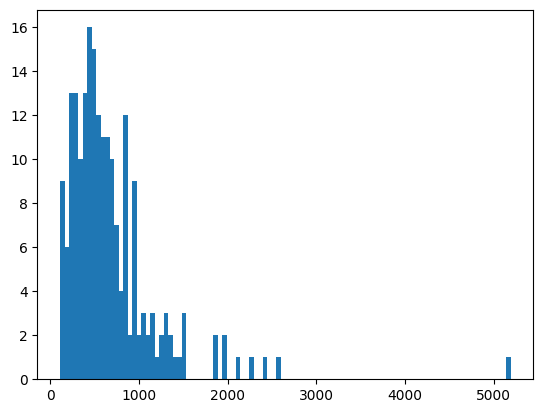

In [8]:
import tqdm
lengths = []
token_count = []
for ques_doc in tqdm.tqdm(os.listdir(question_path)):
    if not ques_doc.endswith(".txt"): continue
    question = open(os.path.join(question_path, ques_doc)).read()
    lengths.append(len(question))

    token_out = codegen_agent.tokenizer(question, return_tensors="pt")
    token_count.append(token_out["input_ids"].shape[1])


# Draw histogram
import matplotlib.pyplot as plt
plt.hist(lengths, bins=100)
plt.show()

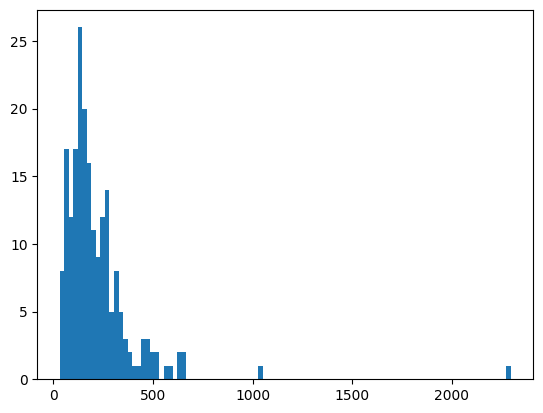

In [9]:
# Draw histogram
import matplotlib.pyplot as plt
plt.hist(token_count, bins=100)
plt.show()

In [15]:
len([i for i in token_count if i > 128])

144

In [13]:
len([i for i in lengths if i > 2048/4])

111

In [12]:
len(lengths)

205